In [1]:
import os
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Set random seeds for reporductivity
torch.manual_seed(42)

In [3]:
import kagglehub
path = kagglehub.dataset_download("zalando-research/fashionmnist")

Using Colab cache for faster access to the 'fashionmnist' dataset.


In [4]:
os.listdir(path)

['t10k-labels-idx1-ubyte',
 't10k-images-idx3-ubyte',
 'fashion-mnist_test.csv',
 'fashion-mnist_train.csv',
 'train-labels-idx1-ubyte',
 'train-images-idx3-ubyte']

In [5]:
df = pd.read_csv(path + '/fashion-mnist_train.csv')

In [6]:
df.shape

(60000, 785)

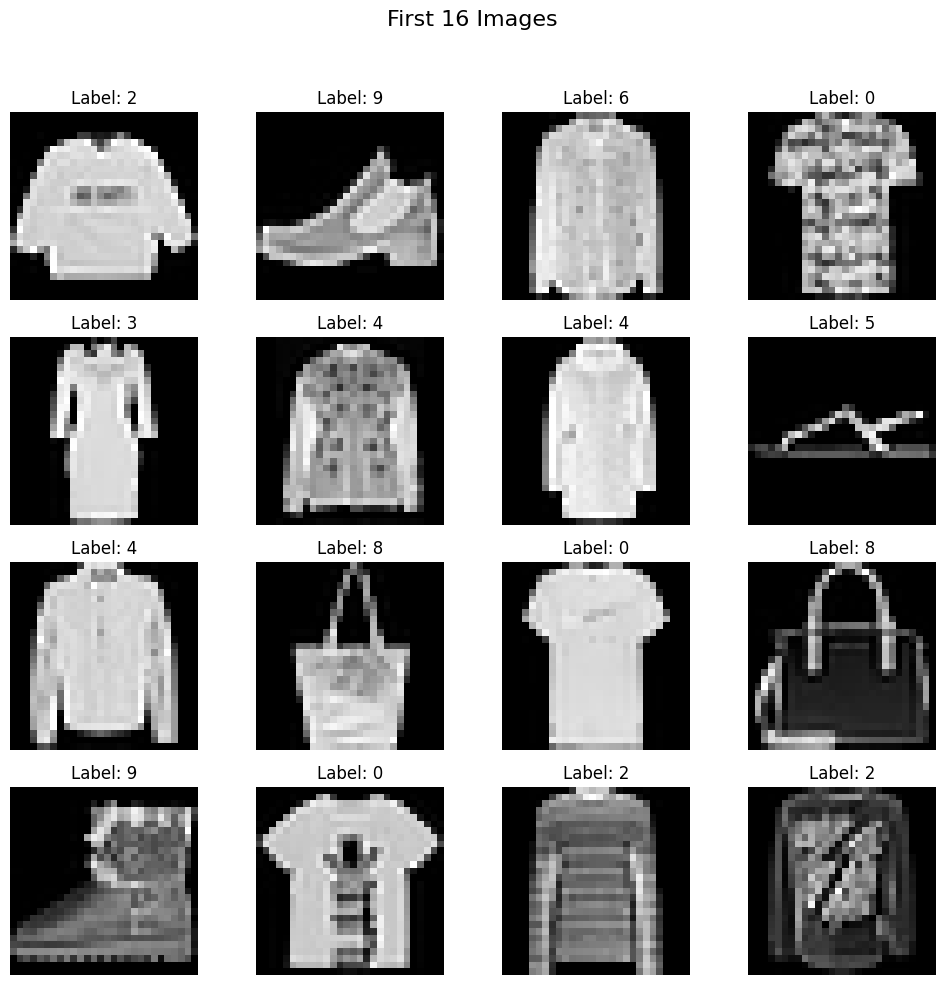

In [10]:
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 Images", fontsize=16)

# Plotting the images from the dataset
for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)
    ax.imshow(img, cmap='gray')
    ax.axis('off')
    ax.set_title(f"Label: {df.iloc[i, 0]}")

plt.tight_layout(rect=[0, 0, 1, 0.95])  # top reserved for title
plt.show()

In [13]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train = X_train/255.0
X_test = X_test/255.0

In [16]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00392157, 0.        ,
        0.        ]])

In [43]:
from torch.utils.data import Dataset
import torch

class CustomDataset(Dataset):

    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, index):
        return self.features[index], self.labels[index]

In [44]:
train_dataset = CustomDataset(X_train, y_train)

In [45]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2275,
         0.5333, 0.0000, 0.0

In [46]:
# Custome test dataset
test_dataset = CustomDataset(X_test, y_test)

In [47]:
# Loader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [48]:
# Defining NN class
class MyNN(nn.Module):
    
    def __init__(self, num_features):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(num_features, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        return self.model(x)

In [49]:
# set Learning Rate
epochs = 100
learning_rate = 0.1

In [50]:
# instatiate the Model
model = MyNN(X_train.shape[1])

# loss function
criterion = nn.CrossEntropyLoss()

# optimizer
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

In [54]:
# Set Model to eval model
for epoch in range(epochs):

    total_epochs_loss = 0

    for batch_features, batch_labels in train_loader:

        # Forward pass
        ouputs = model(batch_features)


        loss = criterion(ouputs, batch_labels)

        # Back pass
        optimizer.zero_grad()  #to clear gradients
        loss.backward()

        #update grads
        optimizer.step()

        total_epochs_loss = total_epochs_loss + loss.item()

    avg_loss = total_epochs_loss/len(train_loader)
    print(f"epoch: {epoch +1}, loss: {avg_loss}")


epoch: 1, loss: 0.0728458268585091
epoch: 2, loss: 0.07444170109989742
epoch: 3, loss: 0.08110692303142665
epoch: 4, loss: 0.06725270879587576
epoch: 5, loss: 0.06657377551402896
epoch: 6, loss: 0.06351460605607523
epoch: 7, loss: 0.06323268582158684
epoch: 8, loss: 0.07337757984765146
epoch: 9, loss: 0.06681285348204741
epoch: 10, loss: 0.06108603598161911
epoch: 11, loss: 0.06364397704665316
epoch: 12, loss: 0.06246866610747141
epoch: 13, loss: 0.0631958186888951
epoch: 14, loss: 0.0595603010392806
epoch: 15, loss: 0.05326467411541186
epoch: 16, loss: 0.06829762624186697
epoch: 17, loss: 0.060716589674712544
epoch: 18, loss: 0.055239454984737674
epoch: 19, loss: 0.054454442761236954
epoch: 20, loss: 0.05147850584539628
epoch: 21, loss: 0.05332468079979299
epoch: 22, loss: 0.06135134578079063
epoch: 23, loss: 0.04968235734687672
epoch: 24, loss: 0.056281395759016355
epoch: 25, loss: 0.05420838090474717
epoch: 26, loss: 0.05055930112330437
epoch: 27, loss: 0.042456982192214734
epoch: 2

In [55]:
# evaluation code
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [58]:
total = 0
correct = 0

with torch.no_grad():

    for batch_features, batch_labels in test_loader:
        outputs = model(batch_features)

        _, predicted = torch.max(outputs, 1)

        total = total + batch_features.shape[0]

        correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

0.8871666666666667
